# Laboratorio 2 MDS -Machine Learning

#### Pablo Elgueta

### Importación de Librería

In [1]:
import pandas as pd
import numpy as np

## 1.- Pokemon

### 1.1.- Importación DataSet

In [2]:
df = pd.read_csv("pokemon.csv")

In [3]:
df_pkm  = pd.DataFrame(df)
df_pkm.shape

(801, 41)

### 1.2.- Exploración de DataSet

#### 1.2.1- Visualizacion de Variables y Valores

In [4]:
pokemon_columns = np.array(df_pkm.columns)
pokemon_columns

array(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight',
       'against_fire', 'against_flying', 'against_ghost', 'against_grass',
       'against_ground', 'against_ice', 'against_normal',
       'against_poison', 'against_psychic', 'against_rock',
       'against_steel', 'against_water', 'attack', 'base_egg_steps',
       'base_happiness', 'base_total', 'capture_rate', 'classfication',
       'defense', 'experience_growth', 'height_m', 'hp', 'japanese_name',
       'name', 'percentage_male', 'pokedex_number', 'sp_attack',
       'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'generation',
       'is_legendary'], dtype=object)

In [5]:
df_pkm.type1.value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
poison       32
ground       32
dark         29
fighting     28
ghost        27
dragon       27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [6]:
df_pkm.type2.value_counts()

flying      95
poison      34
ground      34
fairy       29
psychic     29
fighting    25
steel       22
dark        21
grass       20
water       17
dragon      17
ice         15
rock        14
ghost       14
fire        13
electric     9
bug          5
normal       4
Name: type2, dtype: int64

#### 1.2.2- Conclusión de Exploración del DataSet

Se observa que equiste pokemones que pertencen a 2 tipos, lo cual generará mayor complegidad para identificar las características que definen a cada pokemon, por lo cual se filtrará el dataset dejando solo a aquellos 384 pokemones para el entrenamiento del modelo.

### 1.3.- Preparación de Datos

#### 1.3.1.- Eliminación de Variables y Pokemons de 2 Clases

In [7]:
df_pkm_single = df_pkm[df_pkm['type2'].isnull()]
df_pkm_single = df_pkm_single.loc[:, ['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp', 'type1']]

#### 1.3.2.- Preparación de Arreglos para Análisis

In [8]:
pkm_target = np.array(df_pkm_single.type1)
pkm_target_names = df_pkm_single.type1.unique()

In [9]:
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

In [10]:
pkm_data = df_pkm_single.loc[:, ['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp']]
pkm_data_norm = minmax_norm(pkm_data)
pkm_norm = pd.DataFrame(pkm_data_norm, columns=pkm_data.columns)

#### 1.3.4.- Exploración de Datos

In [11]:
df_pkm_single.type1.value_counts()

normal      61
water       61
grass       37
psychic     35
fire        27
electric    26
fighting    22
bug         18
fairy       16
poison      13
dragon      12
ice         12
rock        11
ground      10
dark         9
ghost        9
steel        4
flying       1
Name: type1, dtype: int64

In [12]:
pd.DataFrame(df_pkm_single).describe()

sp_attack  sp_defense      attack     defense       speed          hp
count  384.000000  384.000000  384.000000  384.000000  384.000000  384.000000
mean    67.815104   68.135417   74.231771   67.955729   63.604167   67.611979
std     31.017803   27.685711   30.740571   27.583164   28.702937   27.877913
min     10.000000   20.000000    5.000000    5.000000    5.000000   20.000000
25%     45.000000   48.000000   52.000000   48.000000   43.000000   50.000000
50%     62.000000   63.000000   70.000000   64.000000   60.000000   65.000000
75%     85.500000   85.000000   95.000000   82.250000   85.000000   79.250000
max    194.000000  200.000000  180.000000  200.000000  180.000000  255.000000

In [13]:
pd.DataFrame(pkm_norm).describe()

sp_attack  sp_defense      attack     defense       speed          hp
count  384.000000  384.000000  384.000000  384.000000  384.000000  384.000000
mean     0.314213    0.267419    0.395610    0.322850    0.334881    0.202604
std      0.168575    0.153810    0.175660    0.141452    0.164017    0.118629
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000
25%      0.190217    0.155556    0.268571    0.220513    0.217143    0.127660
50%      0.282609    0.238889    0.371429    0.302564    0.314286    0.191489
75%      0.410326    0.361111    0.514286    0.396154    0.457143    0.252128
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000

### 1.4.- Análisis Discriminante Lineal

#### 1.4.1.- Muestras de Entrenamiento y Testeo

In [14]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pkm_data_norm, pkm_target, random_state=1,train_size=.85)

#### 1.4.2.- Entrenamiento de Modelo y Predicción

In [16]:
from sklearn import discriminant_analysis
LDAs = discriminant_analysis.LinearDiscriminantAnalysis()
LDAs.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [17]:
predicted = LDAs.predict(X_test)

#### 1.4.3.- Evaluación del Modelo

In [18]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(predicted, y_test))

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16  17
0    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
1    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
2    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
3    0   1   0   1   0   0   0   0   0   1   0   0   0   0   0   0   0   0
4    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
5    0   0   1   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
6    0   1   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
7    0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
8    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
9    0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
10   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
11   0   0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
12   1   1   0   1   0   2   1   0   0   1   0   0   4   0   0   1   0   0
13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
14   0   0   0   0   2   0   0   0   0   1   0   0   1   0   1   0   0   1
15   1   0   0   0   0   0   0   0   0   1   1   0   0   0   0   1   0   0
16   0   0   0   0   0   0   0   0   1   0   0   1   1   0   1   0   0   1
17   4   0   1   1   0   0   1   0   1   1   0   0   1   2   1   0   1   7

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         bug       0.00      0.00      0.00         6
        dark       0.00      0.00      0.00         3
      dragon       0.00      0.00      0.00         2
    electric       0.33      0.33      0.33         3
       fairy       0.00      0.00      0.00         2
    fighting       0.00      0.00      0.00         2
        fire       0.00      0.00      0.00         2
      flying       0.00      0.00      0.00         0
       ghost       0.00      0.00      0.00         3
       grass       0.00      0.00      0.00         6
      ground       0.00      0.00      0.00         2
         ice       0.00      0.00      0.00         1
      normal       0.33      0.57      0.42         7
      poison       0.00      0.00      0.00         2
     psychic       0.17      0.25      0.20         4
        rock       0.25      0.33      0.29         3
       steel       0.00      0.00      0.00         1
       water       0.33    

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\metrics\_cla

### 1.5.- Respuestas Preguntas

#### 1.5.1.- Análisis de Coeficientes del Modelo

In [20]:
LDAs_coef = pd.DataFrame(LDAs.coef_, columns=pkm_data.columns, index=pkm_target_names)

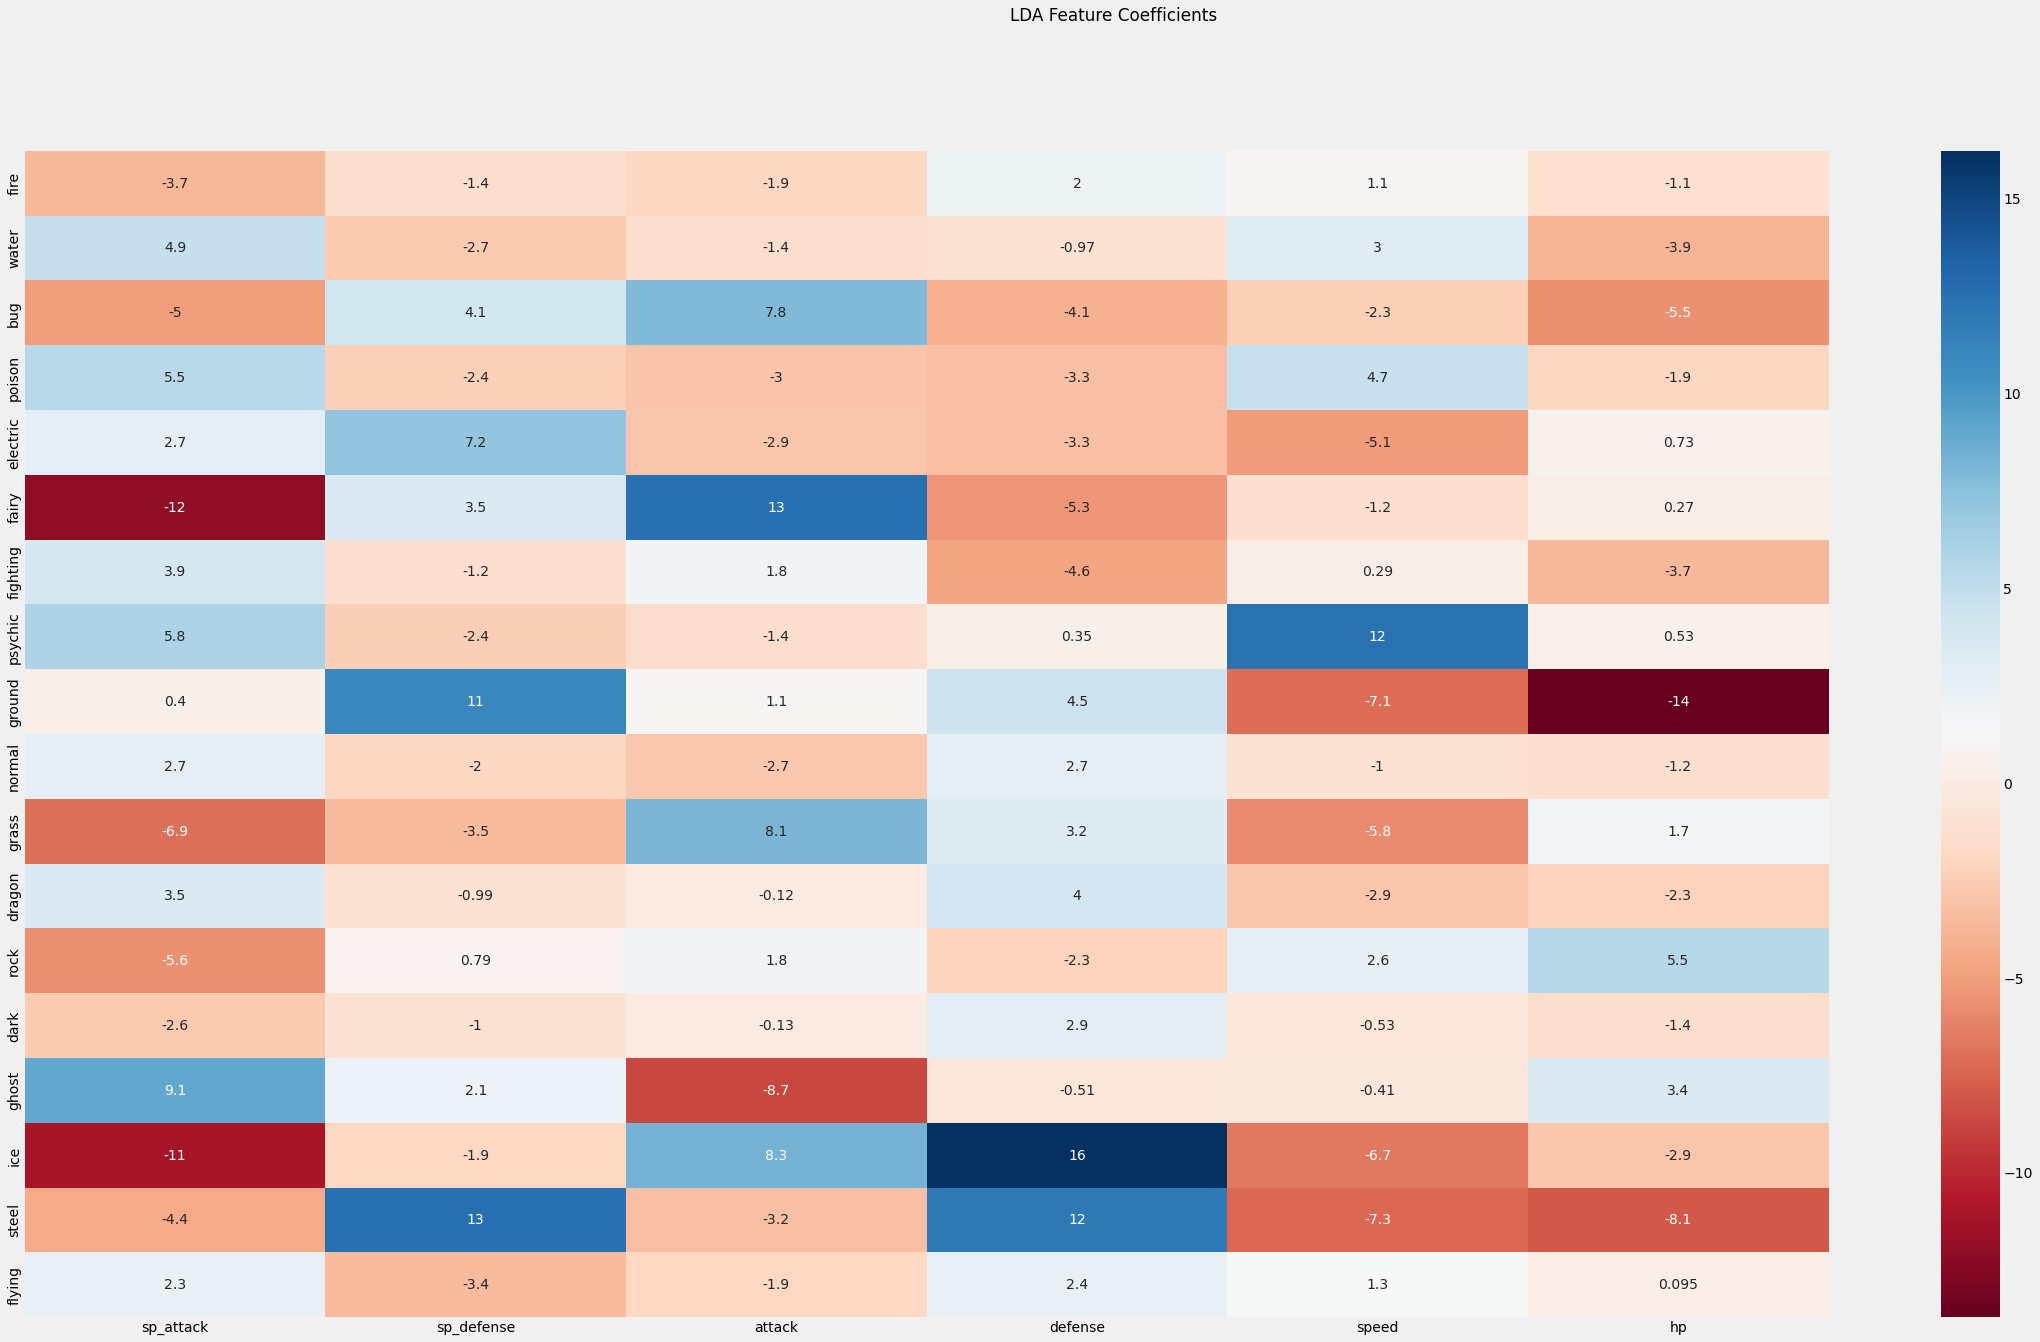

In [21]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(36, 20))
sns.heatmap(pd.DataFrame(LDAs_coef), ax=ax, cmap='RdBu', annot=True)
plt.suptitle('LDA Feature Coefficients')
pass

### 1.6.- Pregunta 1: Un pokémon tipo ‘rock‘ ‘?cómo se diferencia respecto de un pokémon tipo ‘grass‘?

Este mapa de Calor, permite visualizar los coeficientes definidos para el modelo LDA y que tan facil puede ser clasificar un pokemon de acuerdo a sus características. Es posible apreciar que los pokemones tipo grass poseen coeficientes con coles más marcados que los tipo rock.

Esto hace suponer que aquellas clases que poseen coeficiented demaciados altos en magnitud no permiten discriminar facilmente la clase, por ejemplo aquellos con coeficientes muy marcados como: fairy, ground, ice, ghost o gras, tuvieron un recall igual a 0 pese a que el conjunto de testeo incluia muestras para dichas clases, ni tampoco existieron falsos positivos.  

Por otro lado, aunque con baja presición en el caso de pokemones tipo rock si ha sido posible reconocer pokemones. Esta clase posee el factor comun con los pokemones normal y agua, de no poseer coeficientes marcados, para los cuales exisitieron bastantes predicciones con un recall aceptable, pero baja presición.

### 1.7.- Pregunta 2: Su modelo, ¿en qué tipo caracteriza un pokemon con sp_attack: 75.3, sp_defense: 51, attack: 63, defense: 47, speed: 97, hp: 66?

In [22]:
x_clasificar = pd.DataFrame(pkm_data).describe().transpose()[['min','max']].transpose()[['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp']].transpose()
x_clasificar['nuevo'] = [75.3, 51, 63, 47, 97, 66]
x_clasificar = x_clasificar.transpose()
x_clasificar

sp_attack  sp_defense  attack  defense  speed     hp
min         10.0        20.0     5.0      5.0    5.0   20.0
max        194.0       200.0   180.0    200.0  180.0  255.0
nuevo       75.3        51.0    63.0     47.0   97.0   66.0

In [23]:
x_clasificar_norm = minmax_norm(x_clasificar)
x_clasificar_norm

sp_attack  sp_defense    attack   defense     speed        hp
min     0.000000    0.000000  0.000000  0.000000  0.000000  0.000000
max     1.000000    1.000000  1.000000  1.000000  1.000000  1.000000
nuevo   0.354891    0.172222  0.331429  0.215385  0.525714  0.195745

In [24]:
x_clasificar_norm = x_clasificar_norm.transpose().loc[:, ['nuevo']]
x_clasificar_norm

nuevo
sp_attack   0.354891
sp_defense  0.172222
attack      0.331429
defense     0.215385
speed       0.525714
hp          0.195745

In [25]:
predicted = LDAs.predict(x_clasificar_norm.transpose())
predicted

array(['water'], dtype='<U8')

Dadas las caraterísticas sp_attack: 75.3, sp_defense: 51, attack: 63, defense: 47, speed: 97, hp: 66. El pokemón es clasificado como pokemon tipo agua.

## 2.- Cancer

### 2.1.- Importación DataSet

In [26]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()

In [27]:
bc.data.shape

(569, 30)

### 2.2.- Exploració de Datos

In [28]:
bc.target_names

array(['malignant', 'benign'], dtype='<U9')

In [29]:
bc.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [30]:
bc_df= pd.DataFrame(bc.data,columns = bc.feature_names)
bc_df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

In [31]:
pd.DataFrame(bc.data,columns = bc.feature_names).describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst radius  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       worst texture  worst perimeter   worst area  worst smoothness  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       worst compactness  worst concavity  worst concave points  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       worst symmetry  worst fractal dimension  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

### 2.3.- Preparación de Datos

Primero se acota el set de datos a uno que solo incorpore las variables a utilizar

In [32]:
bc_caso_1 = bc_df[['mean radius','mean concave points']]
bc_caso_1

mean radius  mean concave points
0          17.99              0.14710
1          20.57              0.07017
2          19.69              0.12790
3          11.42              0.10520
4          20.29              0.10430
..           ...                  ...
564        21.56              0.13890
565        20.13              0.09791
566        16.60              0.05302
567        20.60              0.15200
568         7.76              0.00000

[569 rows x 2 columns]

### 2.4.- Regresión Logísitca

#### 2.4.1.- Muestras de Entrenamiento y Testeo

In [33]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

#### 2.4.2.- Entrenamiento de Modelo y Testeo

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bc_caso_1, bc.target, random_state=1,train_size=.9)
LR.fit(X_train,y_train)
LR_predicted = LR.predict(X_test)
pd.DataFrame(confusion_matrix(LR_predicted,y_test))

0   1
0  19   0
1   4  34

In [35]:
print(classification_report(y_test, LR_predicted))


              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.89      1.00      0.94        34

    accuracy                           0.93        57
   macro avg       0.95      0.91      0.92        57
weighted avg       0.94      0.93      0.93        57



In [36]:
bc_caso_1.describe()

mean radius  mean concave points
count   569.000000           569.000000
mean     14.127292             0.048919
std       3.524049             0.038803
min       6.981000             0.000000
25%      11.700000             0.020310
50%      13.370000             0.033500
75%      15.780000             0.074000
max      28.110000             0.201200

#### 2.3.3.- Testeo y Validación

In [37]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(LR_predicted,y_test))

0   1
0  19   0
1   4  34

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, LR_predicted))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90        23
           1       0.89      1.00      0.94        34

    accuracy                           0.93        57
   macro avg       0.95      0.91      0.92        57
weighted avg       0.94      0.93      0.93        57



### 2.4.- Pregunta 1: Una mujer con un nódulo con radio medio de 15.5, ¿qué tan probable es que tenga cáncer?

In [39]:
yprob = LR.predict_proba([[15.5 , 0.048919]])
pd.DataFrame(yprob.round(2))

C:\Users\pablo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0     1
0  0.68  0.32

Existe una probabilidad del 32% de que una mujer con un nódulo de radio medio de 15.5 tenga cancer.

### 2.5.- Pregunta 2: ¿ Cuántas veces más tiene una mujer con puntos cóncavos de 0.19 y radio medio de 16 que una mujer con puntos cóncavos de 0.25 y radio medio de 11.65 de tener cáncer? 

In [40]:
yprob_A = LR.predict_proba([[16 , 0.19]])
yprob_B = LR.predict_proba([[11.65 , 0.25]])
print(f'={yprob_A[0][1]}/{yprob_B[0][1]}')
print(f'={round((yprob_B[0][1]/yprob_A[0][1]),2)}')

=0.1903679496781757/0.9435843415441764
=4.96


C:\Users\pablo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
C:\Users\pablo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


La relación es inversa a lo planteado, existe una probabilidad 4.96 veces mayor de padecer cancer para una mujer con un tumor con puntos concavos de 0.25 y radio medio de 11.65 que para una mujer con puntos concavos de 0.19 y radio medio de 16.